In [652]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [653]:
from glob import glob

In [654]:
csv_files = glob("zippedData/*.csv.gz")

In [655]:
csv_files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [656]:
movie_info_df = pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter = '\t')

In [657]:
import os 

In [658]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv","").replace(".", "_")
    filename_df = pd.read_csv(filename,index_col = 0)
    csv_files_dict[filename_cleaned] = filename_df

In [659]:
csv_files_dict.keys()

dict_keys(['imdb_title_crew_gz', 'tmdb_movies_gz', 'imdb_title_akas_gz', 'imdb_title_ratings_gz', 'imdb_name_basics_gz', 'imdb_title_basics_gz', 'tn_movie_budgets_gz', 'bom_movie_gross_gz', 'imdb_title_principals_gz'])

In [660]:
#most profitable runtime

In [661]:
movie_budgets_df = csv_files_dict['tn_movie_budgets_gz']

In [662]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [663]:
# We going to check data type for the columns we have 

In [664]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [665]:
#It does not look good because the Data type for the columns with numbers is 
#object when its supoost to be int. we are going to switch them to int.

In [666]:
#movie_budgets_df['production_budget'].astype('int64')
#we tried to which the type but it did not work because the "$" and ","
#we are going to get rid of "$" and "," first using the .replace()

In [667]:
def converted_col_to_int(df, col):
    df[col] = df[col].str.replace('$', '').str.replace(',','').astype('int')
    return df

In [668]:
cols_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in cols_to_convert:
    movie_budgets_df = converted_col_to_int(movie_budgets_df, col)
    

In [669]:
#now we are going to check our work by making sure 
#[production budget, domestic gross, worldwide gross] = int64

In [670]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 271.0+ KB


In [671]:
#now we check if we have any missing values

In [672]:
movie_budgets_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [673]:
#now we are going to look at the 5 most occuring values to check if there is any weird values

In [674]:
for col in movie_budgets_df:
    print(f"Currently checking values from col:{col}")
    print(f"Top 5 values:\n{movie_budgets_df[col].value_counts(normalize = True)[0:5]}")
    print('-------------------------------------------')

Currently checking values from col:release_date
Top 5 values:
Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2012    0.002248
Name: release_date, dtype: float64
-------------------------------------------
Currently checking values from col:movie
Top 5 values:
Home               0.000519
Halloween          0.000519
King Kong          0.000519
The Love Letter    0.000346
Ca$h               0.000346
Name: movie, dtype: float64
-------------------------------------------
Currently checking values from col:production_budget
Top 5 values:
20000000    0.039952
10000000    0.036666
30000000    0.030612
15000000    0.029920
25000000    0.029575
Name: production_budget, dtype: float64
-------------------------------------------
Currently checking values from col:domestic_gross
Top 5 values:
0           0.094777
8000000     0.001557
2000000     0.001211
7000000     0.001211
10000000    0.001038
Name: domestic_gross, dtype: float64
-----

In [675]:
movie_budgets_df['difference'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [676]:
title_basics_df = csv_files_dict['imdb_title_basics_gz']

In [677]:
title_basics_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [678]:
movie_runtime_df = pd.merge(movie_budgets_df, title_basics_df, left_on = ['movie'],
                           right_on = ['primary_title'], how = 'left')

In [679]:
movie_runtime_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,Avatar,Abatâ,2011.0,93.0,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,NaN,NaN,NaN,NaN,NaN


In [680]:
# it looks like we have lots of missing data again but much less than the last 2 
# questions we worked on, for the runtime column which i am intersted in we have
#53% missing data

In [681]:
movie_runtime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7221 entries, 0 to 7220
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       7221 non-null   object 
 1   movie              7221 non-null   object 
 2   production_budget  7221 non-null   int64  
 3   domestic_gross     7221 non-null   int64  
 4   worldwide_gross    7221 non-null   int64  
 5   difference         7221 non-null   int64  
 6   primary_title      3815 non-null   object 
 7   original_title     3814 non-null   object 
 8   start_year         3815 non-null   float64
 9   runtime_minutes    3328 non-null   float64
 10  genres             3743 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 677.0+ KB


In [682]:
movie_runtime_df.isna().sum() / len(movie_runtime_df)

release_date         0.000000
movie                0.000000
production_budget    0.000000
domestic_gross       0.000000
worldwide_gross      0.000000
difference           0.000000
primary_title        0.471680
original_title       0.471818
start_year           0.471680
runtime_minutes      0.539122
genres               0.481651
dtype: float64

In [683]:
movie_runtime_df.dropna(inplace=True)

In [684]:
movie_runtime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3309 entries, 0 to 7219
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       3309 non-null   object 
 1   movie              3309 non-null   object 
 2   production_budget  3309 non-null   int64  
 3   domestic_gross     3309 non-null   int64  
 4   worldwide_gross    3309 non-null   int64  
 5   difference         3309 non-null   int64  
 6   primary_title      3309 non-null   object 
 7   original_title     3309 non-null   object 
 8   start_year         3309 non-null   float64
 9   runtime_minutes    3309 non-null   float64
 10  genres             3309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 310.2+ KB


In [685]:
sorted_runtime = movie_runtime_df.sort_values(by= 'runtime_minutes', ascending=True)[0:2000]

In [686]:
sorted_runtime.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,primary_title,original_title,start_year,runtime_minutes,genres
6980,"Jul 22, 2005",November,250000,191862,191862,-58138,November,November,2014.0,1.0,"Documentary,History"
281,"Mar 27, 2015",Home,130000000,177397510,385997896,255997896,Home,Home,2012.0,3.0,"Biography,Documentary"
2171,"Feb 24, 2012",Wanderlust,32500000,17288155,24159934,-8340066,Wanderlust,Wanderlust,2015.0,3.0,"Adventure,Documentary"
4266,"Jun 5, 2009",Home,12000000,0,0,-12000000,Home,Home,2012.0,3.0,"Biography,Documentary"
2543,"Mar 18, 2011",Limitless,27000000,79249455,155564919,128564919,Limitless,Limitless,2015.0,3.0,"Biography,Documentary"


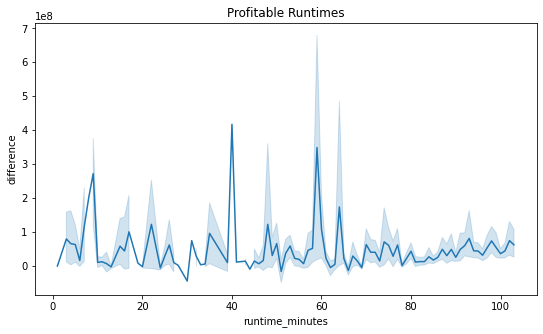

In [687]:
plt.figure(figsize= (9,5))
sns.lineplot(data=sorted_runtime, x="runtime_minutes", y="difference", palette="Blues_d")
plt.title('Profitable Runtimes')
plt.savefig('1.png')

In [688]:
# top 5 directors to work with

In [689]:
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [690]:
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [691]:
movie_info_df.isna().sum()/len(movie_info_df)

id              0.000000
synopsis        0.039744
rating          0.001923
genre           0.005128
director        0.127564
writer          0.287821
theater_date    0.230128
dvd_date        0.230128
currency        0.782051
box_office      0.782051
runtime         0.019231
studio          0.683333
dtype: float64

In [692]:
#we can see we have lots of missing values here, in the column we need which is 
#box office we have 78% missing values.

In [693]:
#now we are going to look at the 5 most occuring values to check if there is any weird values

In [694]:
for col in movie_info_df:
    print(f"Currently checking values from col:{col}")
    print(f"Top 5 values:\n{movie_info_df[col].value_counts(normalize = True)[0:5]}")
    print('-------------------------------------------')

Currently checking values from col:id
Top 5 values:
2000    0.000641
697     0.000641
673     0.000641
674     0.000641
675     0.000641
Name: id, dtype: float64
-------------------------------------------
Currently checking values from col:synopsis
Top 5 values:
A group of air crash survivors are stranded in the Mongolian desert with no chance of rescue. Facing a brutal environment, dwindling resources, and an attack by desert smugglers, they realize their only hope is doing the "impossible"--building a new plane from the wreckage.                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [695]:
movie_info_df.dropna(inplace=True)

In [696]:
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    object
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.9+ KB


In [697]:
#It does not look good because the Data type for the "box office" column with numbers is 
#object when its supoost to be int. we are going to switch them to int.

In [698]:
def converted_col_to_int(df, col):
    df[col] = df[col].str.replace(',','').astype('int')
    return df

In [699]:
cols_to_convert2 = ['box_office']

for col in cols_to_convert2:
    movie_info_df = converted_col_to_int(movie_info_df, col)
    

In [700]:
#now we are going to check our work by making sure 
#[box office] = int64

In [701]:
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    int64 
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(2), object(10)
memory usage: 23.9+ KB


In [717]:
movie_info_df.describe()

,id,box_office
count,235.000000,2.350000e+02
mean,1010.217021,4.195840e+07
std,578.522979,6.263016e+07
min,3.000000,3.630000e+02
25%,488.500000,2.302444e+06
50%,1044.000000,1.553631e+07
75%,1526.000000,5.264952e+07
max,1985.000000,3.680000e+08


In [702]:
sorted_directors = movie_info_df.sort_values(by = 'box_office', ascending= False).head()

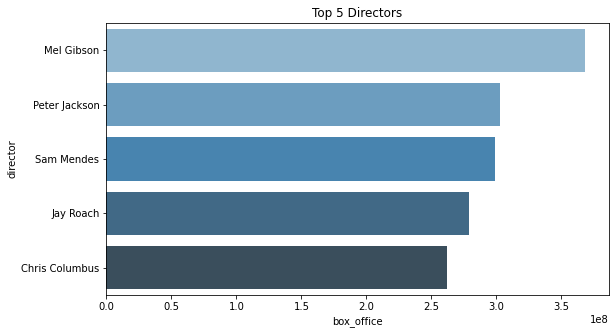

In [703]:
plt.figure(figsize= (9,5))
sns.barplot(x= 'box_office', y = 'director', data= sorted_directors, palette="Blues_d")
plt.title('Top 5 Directors')
plt.savefig('2.png')

In [704]:
#top 5 writers to work with 

In [705]:
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915,82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114,123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,1039869,108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,20518224,127 minutes,Universal Pictures


In [706]:
#looking at the writers column looks like some on the rows has 2 names split by "|"

In [707]:
movie_info_df['writer_split'] = movie_info_df['writer'].map(lambda x: x.split("|")if x else x )


In [708]:
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,writer_split
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One,"[David Cronenberg, Don DeLillo]"
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915,82 minutes,Paramount Pictures,[Mike White]
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114,123 minutes,Sony Pictures Classics,"[Raymond Carver, Beatrix Christian]"
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,1039869,108 minutes,ATO Pictures,[Norman Snider]
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,20518224,127 minutes,Universal Pictures,"[Chris Morgan, Hossein Amini]"


In [709]:
#we got a new column just for the writer's name list 
#now we need to separate them and only wants each name to appear once using set()

In [710]:
all_writers = set()
for writer in movie_info_df['writer_split']:
    if writer:
        all_writers.update(writer)

In [711]:
all_writers

{'Aaron Covington',
 'Aaron Seltzer',
 'Akiva Goldsman',
 'Alan Cumming',
 'Alec Sulkin',
 'Alex Kendrick',
 'Alex Mann',
 'Aline Brosh McKenna',
 'Andrew Bovell',
 'Andrew Dominik',
 'Andrew Osborne',
 'Andrew Stanton',
 'Andy Weiss',
 'Anthony Peckham',
 'Ariel Shaffir',
 'Ash Brannon',
 'Barry Levinson',
 'Beatrix Christian',
 'Ben Younger',
 'Benedict Fitzgerald',
 'Betsy Giffen Nowrasteh',
 'Bill Haney',
 'Bill Pryor',
 'Billy Crystal',
 'Bin Wang',
 'Bob Glaudini',
 'Bob Nelson',
 'Bobby Farrelly',
 'Brian Bird',
 'Brian Helgeland',
 'Brian Hohlfeld',
 'Brian Regan',
 'Brian Taylor',
 'Britt Allcroft',
 'Bryan Singer',
 'Burr Steers',
 'Cameron Crowe',
 'Candace Lee',
 'Captain Mauzner',
 'Carl Johansen',
 'Caroline Thompson',
 'Charles Shyer',
 'Charlyne Yi',
 'Chris Denk',
 'Chris Galletta',
 'Chris Morgan',
 'Christopher McQuarrie',
 'Ciro Guerra',
 'Craig Brewer',
 'Craig Mazin',
 'Cyrus Nowrasteh',
 'Dan Harris',
 'Dan Mazer',
 'Dana Fox',
 'Dana Stevens',
 'Daniel Harris',


In [712]:
movie_info_df['writer_split1'] = movie_info_df['writer_split'].map(lambda x: x[0])

In [713]:
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,writer_split,writer_split1
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One,"[David Cronenberg, Don DeLillo]",David Cronenberg
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915,82 minutes,Paramount Pictures,[Mike White],Mike White
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114,123 minutes,Sony Pictures Classics,"[Raymond Carver, Beatrix Christian]",Raymond Carver
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,1039869,108 minutes,ATO Pictures,[Norman Snider],Norman Snider
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,20518224,127 minutes,Universal Pictures,"[Chris Morgan, Hossein Amini]",Chris Morgan


In [716]:
movie_info_df.describe()

,id,box_office
count,235.000000,2.350000e+02
mean,1010.217021,4.195840e+07
std,578.522979,6.263016e+07
min,3.000000,3.630000e+02
25%,488.500000,2.302444e+06
50%,1044.000000,1.553631e+07
75%,1526.000000,5.264952e+07
max,1985.000000,3.680000e+08


In [714]:
sorted_writers = movie_info_df.sort_values(by = 'box_office', ascending= False).head()

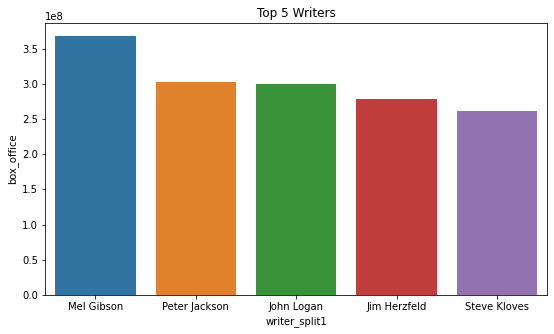

In [715]:
plt.figure(figsize= (9,5))
sns.barplot(x= "writer_split1", y= "box_office", data= sorted_writers)
plt.title('Top 5 Writers')
plt.savefig('3.png')